<a href="https://www.kaggle.com/code/sinha05/sentiment-analysis?scriptVersionId=187226109" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#stylesheet for plotting
plt.style.use('ggplot')

import nltk

In [3]:
df = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


 * **Text** : this column determine the review left by the customer. Sentiment Analysis will be run on this text.
 * **Score**: Rating given by customer out of 5

In [7]:
df.shape

(10000, 10)

In [6]:
df= df[:10000]

# EDA

<Axes: title={'center': 'Reviews '}, ylabel='count'>

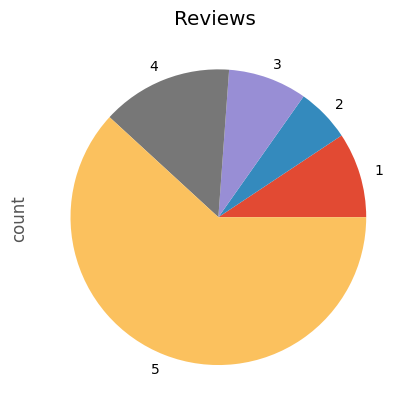

In [8]:
df['Score'].value_counts().sort_index().plot(kind='pie', title="Reviews ")


* Dataset is biased towards positive reviews

## Basic NLTK

In [10]:
ex = df['Text'][92]
print(ex)

This food is great - all ages dogs.  I have a 3 year old and a puppy.  They are both so soft and hardly ever get sick.  The food is good especially when you have Amazon Prime shipping  :)


In [11]:
tokens = nltk.word_tokenize(ex) 
#splits the sentences into list of words

In [9]:
nltk.pos_tag??

Signature: nltk.pos_tag(tokens, tagset=None, lang='eng')
Source:   
def pos_tag(tokens, tagset=None, lang='eng'):
    """
    Use NLTK's currently recommended part of speech tagger to
    tag the given list of tokens.

        >>> from nltk.tag import pos_tag
        >>> from nltk.tokenize import word_tokenize
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad."))
        [('John', 'NNP'), ("'s", 'POS'), ('big', 'JJ'), ('idea', 'NN'), ('is', 'VBZ'),
        ("n't", 'RB'), ('all', 'PDT'), ('that', 'DT'), ('bad', 'JJ'), ('.', '.')]
        >>> pos_tag(word_tokenize("John's big idea isn't all that bad."), tagset='universal')
        [('John', 'NOUN'), ("'s", 'PRT'), ('big', 'ADJ'), ('idea', 'NOUN'), ('is', 'VERB'),
        ("n't", 'ADV'), ('all', 'DET'), ('that', 'DET'), ('bad', 'ADJ'), ('.', '.')]

    NB. Use `pos_tag_sents()` for efficient tagging of more than one sentence.

    :param tokens: Sequence of tokens to be tagged
    :type tokens: list(str)
    :param tag

In [12]:
#find pat of speech
tags = nltk.pos_tag(tokens)

In [11]:
nltk.chunk.ne_chunk??

Signature: nltk.chunk.ne_chunk(tagged_tokens, binary=False)
Source:   
def ne_chunk(tagged_tokens, binary=False):
    """
    Use NLTK's currently recommended named entity chunker to
    chunk the given list of tagged tokens.
    """
    if binary:
        chunker_pickle = _BINARY_NE_CHUNKER
    else:
        chunker_pickle = _MULTICLASS_NE_CHUNKER
    chunker = load(chunker_pickle)
    return chunker.parse(tagged_tokens)
File:      /opt/conda/lib/python3.10/site-packages/nltk/chunk/__init__.py
Type:      function

In [13]:
entities = nltk.chunk.ne_chunk(tags)
entities.pprint()

(S
  This/DT
  food/NN
  is/VBZ
  great/JJ
  -/:
  all/DT
  ages/NNS
  dogs/NNS
  ./.
  I/PRP
  have/VBP
  a/DT
  3/CD
  year/NN
  old/JJ
  and/CC
  a/DT
  puppy/JJ
  ./.
  They/PRP
  are/VBP
  both/DT
  so/RB
  soft/JJ
  and/CC
  hardly/RB
  ever/RB
  get/VB
  sick/JJ
  ./.
  The/DT
  food/NN
  is/VBZ
  good/JJ
  especially/RB
  when/WRB
  you/PRP
  have/VBP
  (PERSON Amazon/NNP)
  Prime/NNP
  shipping/NN
  :/:
  )/))


# Using VADER Sentiment Scoring

* Uses Bag of Words Approach

In [14]:
!pip install twython

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [16]:
SentimentIntensityAnalyzer??

Init signature:
SentimentIntensityAnalyzer(
    lexicon_file='sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt',
)
Source:        
class SentimentIntensityAnalyzer(object):
    """
    Give a sentiment intensity score to sentences.
    """
    def __init__(self, lexicon_file="sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt"):
        self.lexicon_file = nltk.data.load(lexicon_file)
        self.lexicon = self.make_lex_dict()

    def make_lex_dict(self):
        """
        Convert lexicon file to a dictionary
        """
        lex_dict = {}
        for line in self.lexicon_file.split('\n'):
            (word, measure) = line.strip().split('\t')[0:2]
            lex_dict[word] = float(measure)
        return lex_dict

    def polarity_scores(self, text):
        """
        Return a float for sentiment strength based on the input text.
        Positive values are positive valence, negative value are negative
        valence.
        """
        sentitext = Sent

In [17]:
#Get polarity score of all text
result = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    result[myid] = sia.polarity_scores(text)
    

  0%|          | 0/10000 [00:00<?, ?it/s]

In [18]:
result_pd = pd.DataFrame(result).T

In [19]:
result_pd = result_pd.reset_index().rename(columns={'index':'Id'})
result_pd = result_pd.merge(df,how="left")

In [20]:
result_pd.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


* **COMPOUND** lies between {-1,1}. 1 stands for positive and -1 for negative

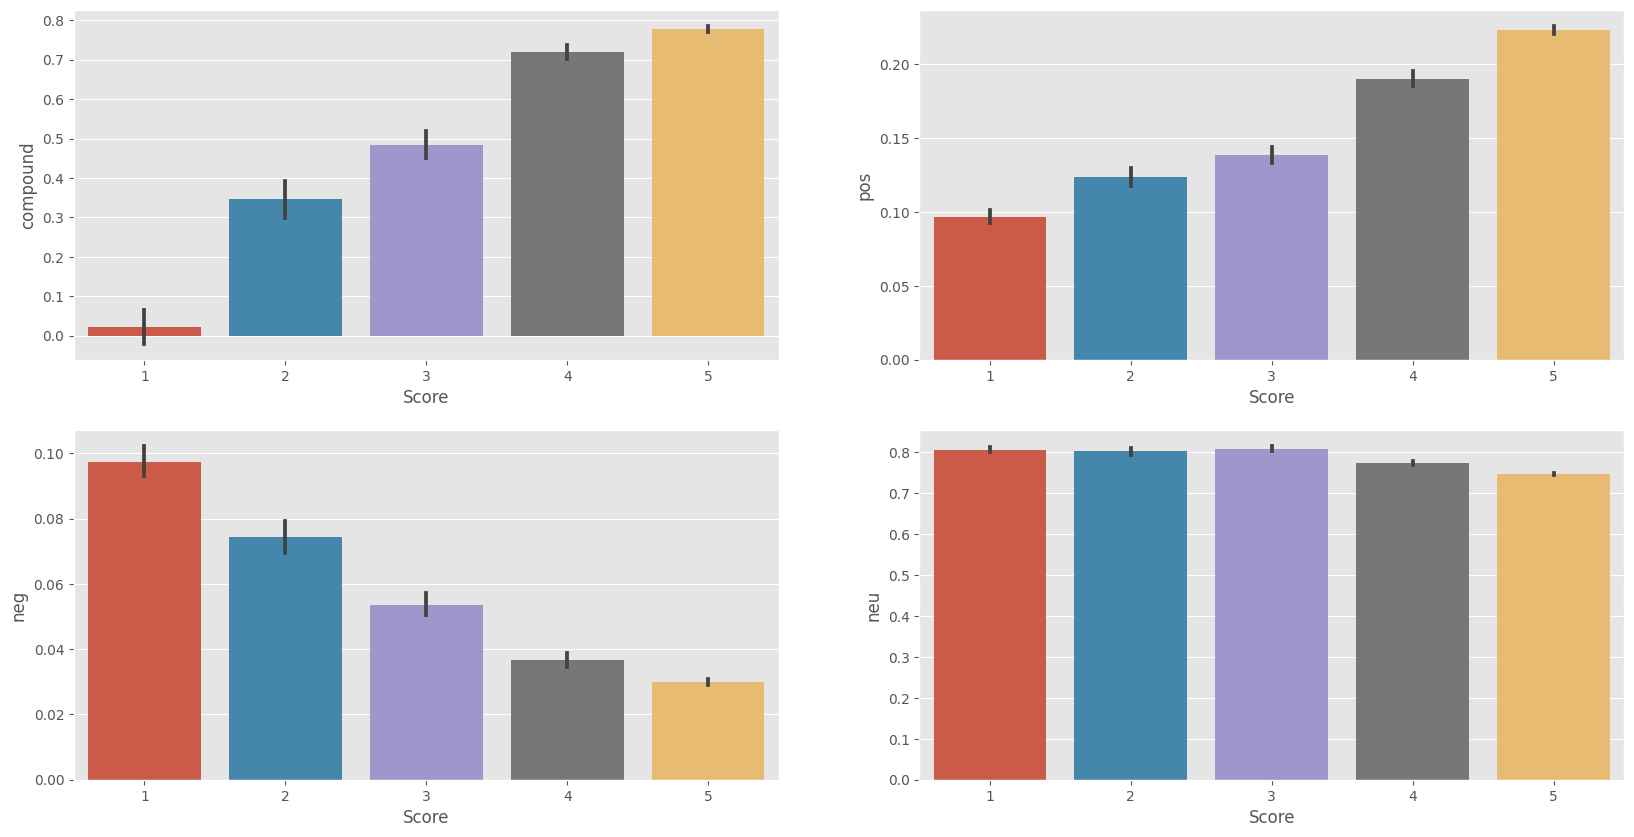

In [21]:
fig,axs = plt.subplots(2,2,figsize=(20,10))
axs = axs.flatten()
sns.barplot(data=result_pd,x='Score',y='compound',ax = axs[0])
sns.barplot(data=result_pd, x='Score',y='pos',ax = axs[1])
sns.barplot(data=result_pd,x='Score',y='neg',ax = axs[2])
sns.barplot(data=result_pd,x='Score',y='neu',ax=axs[3])
plt.show()

# TRANSFER LEARNING

## Using Pretrained Model

* provided by hugging face

In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer .from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [24]:
#RUNNING ON MODEL
encoded = tokenizer(ex,return_tensors='pt')

In [25]:
#RUN ON WHOLE DATASET
def polarity_scores_roberta(ex):
    output = model(**encoded)
    scores  = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos': scores[2]

}
    return (scores_dict) 

In [26]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = vader_result_rename | roberta_result
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/10000 [00:00<?, ?it/s]

In [38]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare results

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

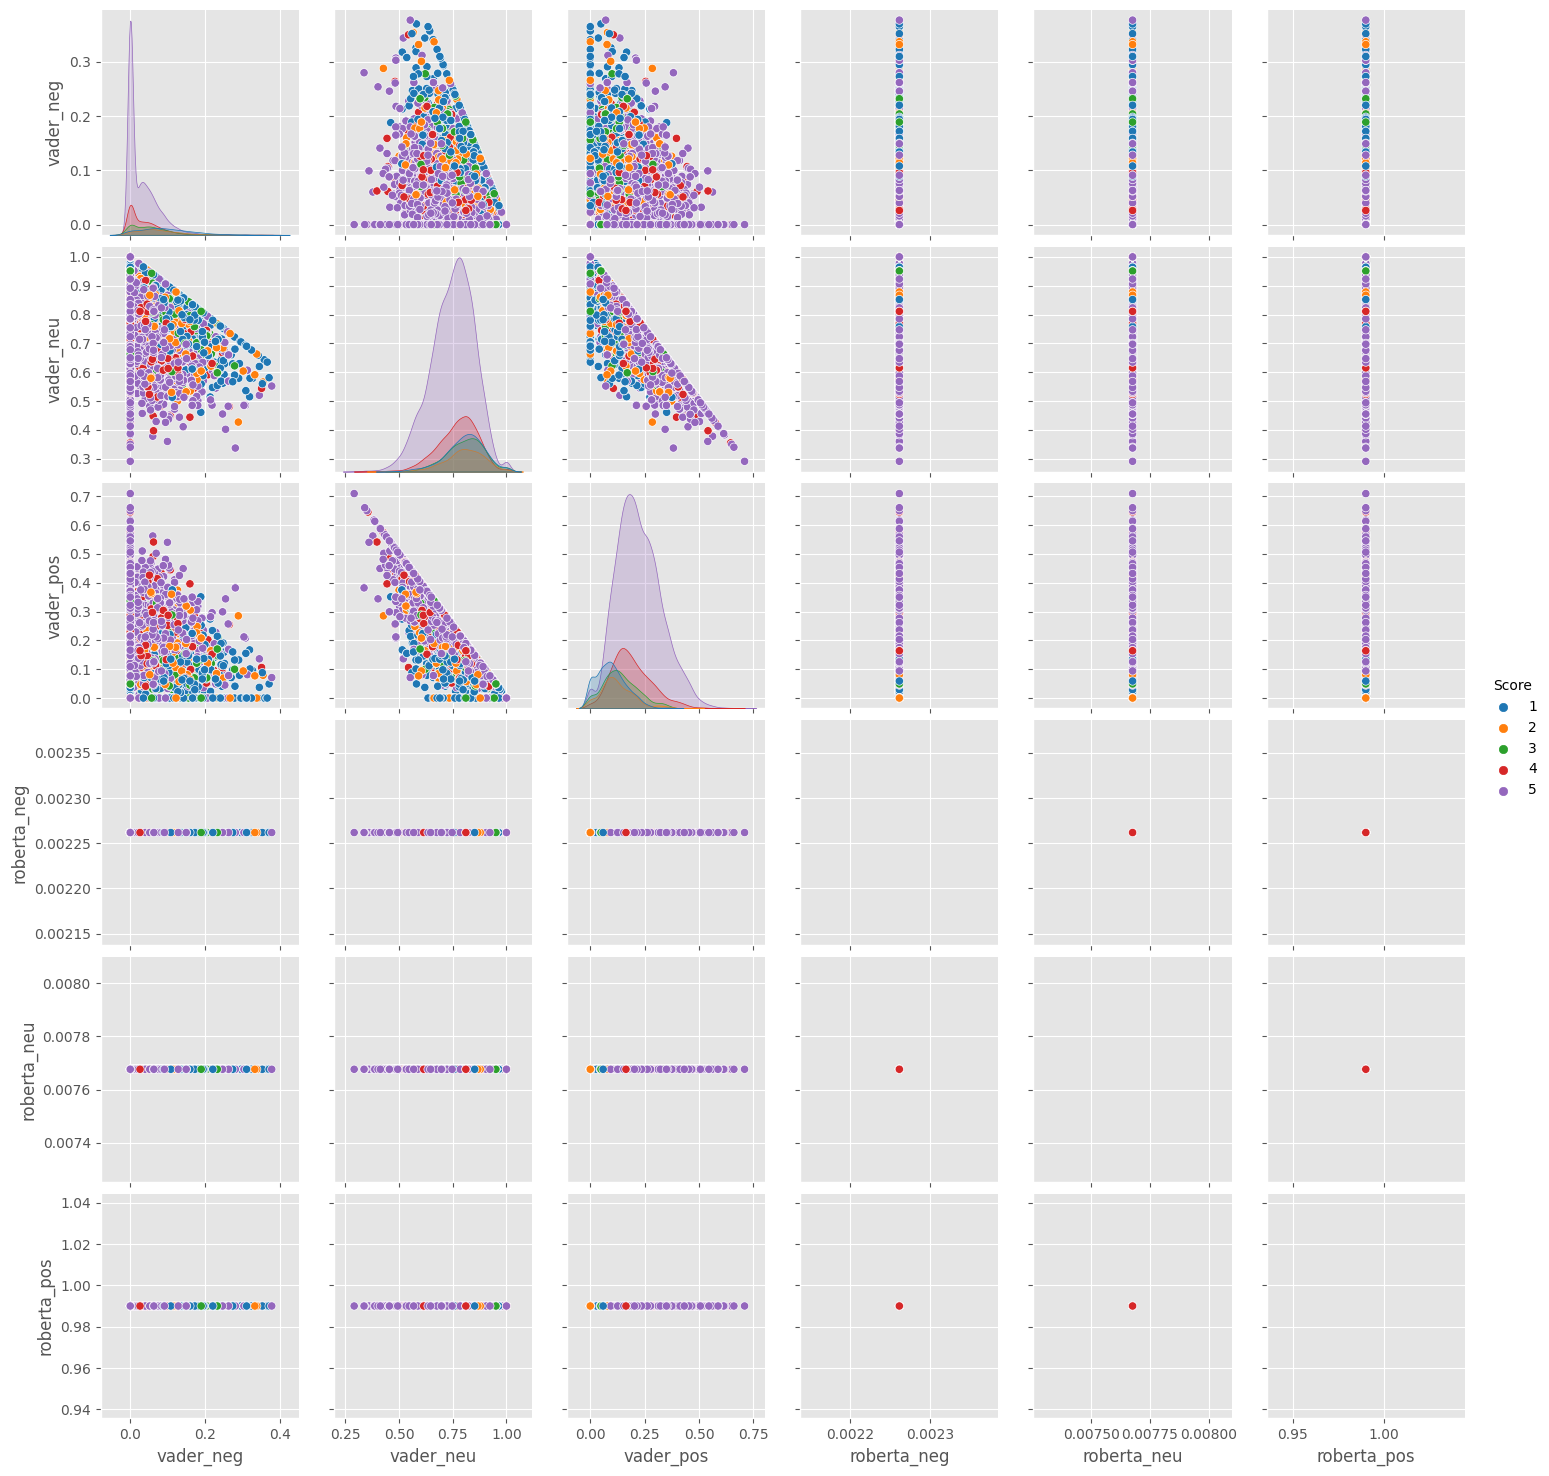

In [39]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# REVIEW

In [43]:
results_df.query('Score == 1').sort_values('roberta_pos',ascending=False)['Text'].values[8]

'I had high hopes for this product, because it is healthy and affordable.  But neither of my 2 Chihuahuas liked it; one just sniffed at it and walked away; the other dog chewed on it for a short while and then walked away from it.  One dog likes <a href="http://www.amazon.com/gp/product/B003KUO2XS">Nylabone Nutri Dent Original Minichews for Mini Dogs, 72-Count Pouch</a>, and the other dog likes <a href="http://www.amazon.com/gp/product/B004B3W4N8">6" BULLY STICKS - Free Range Standard Regular Thick Select 6 inch (10 Pack), by Downtown Pet Supply</a>.  I was looking for some alternatives that were healthy and more affordable.  I guess I\'ll be sticking with their current treats for now.'

In [44]:
results_df.query('Score == 1').sort_values('vader_pos',ascending=False)['Text'].values[8]

"This tastes terrible...  Like putting aritficial sweetener in already sweet hot chocolate.  The best I have tried so far is Swiss Miss Hot Chocolate K-Cups.  Don't think they are sold on Amazon yet..."